# Overview of Pattern Searching

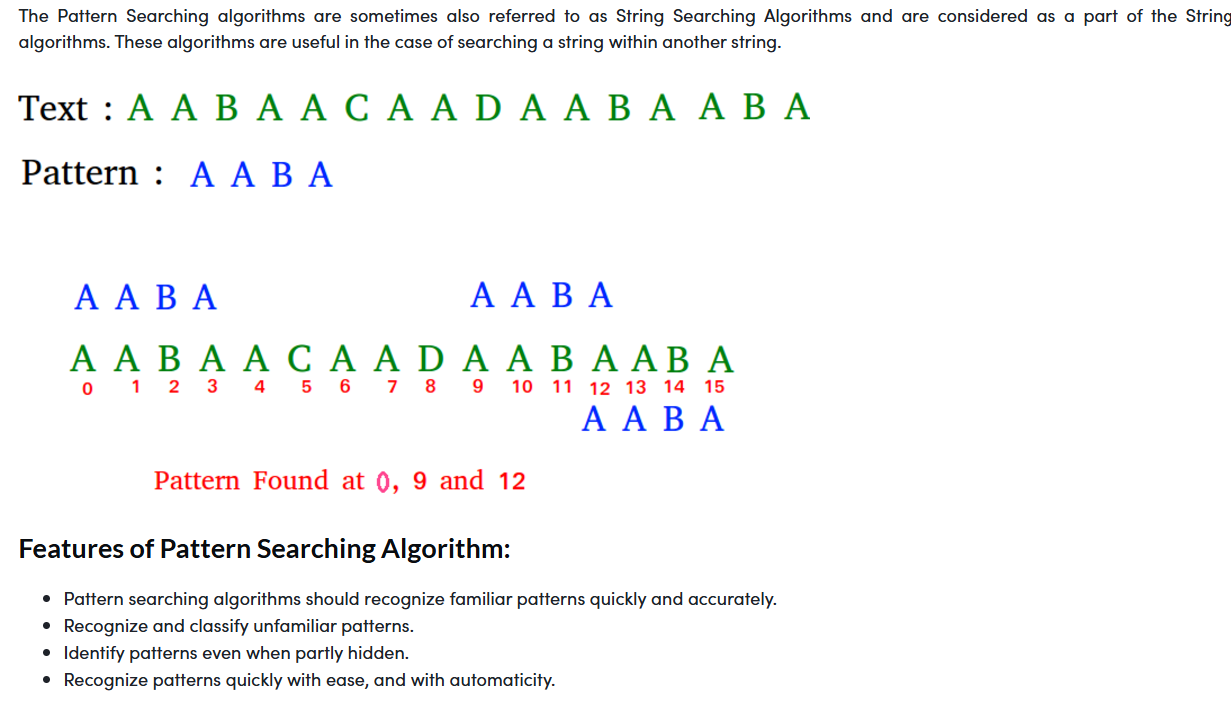

In [ ]:
txt = input("Enter Text:\n")
pat = input("Enter Pattern:\n")

pos = txt.find(pat)

while pos>=0:

    print(pos)
    pos = txt.find(pat,pos+1)

Enter Text:
The Knight Riders are a formidable team.
Enter Pattern:
te
35


# Naive Pattern Searching

**Given a pattern and a text, we need to print all occurrences of the pattern in the text. This video talks about O((m+n-1)*m) solution.**

In [ ]:
# Naive Pattern Searching

def naivepat(txt, pat) :
    m = len(pat)
    n = len(txt)
    for i in range(n-m+1) :
        j = 0
        while j < m :
            if pat[j] != txt[i + j] :
                break
            j = j + 1
        if j == m :
            print(i)


txt = "ABCABCD"
pat = "ABCD"

naivepat(txt, pat)

3


# Improved Naive Pattern Searching for Distinct

In [ ]:
# Naive Pattern Searching

def distpatsearch(txt, pat) :
    m = len(pat)
    n = len(txt)
    i = 0
    while i <= (n-m) :
        for j in range(m) :
            if pat[j] != txt[i + j] :
                break
            j += 1
        if j == m :
            print(i, end = " ")
            i += m
        if j == 0 :
            i += 1
        else :
            i += j


txt = "ABCEABFABCD"
pat = "ABCD"

distpatsearch(txt, pat)

7 

# Rabin-Karp Algorithm for Pattern Searching

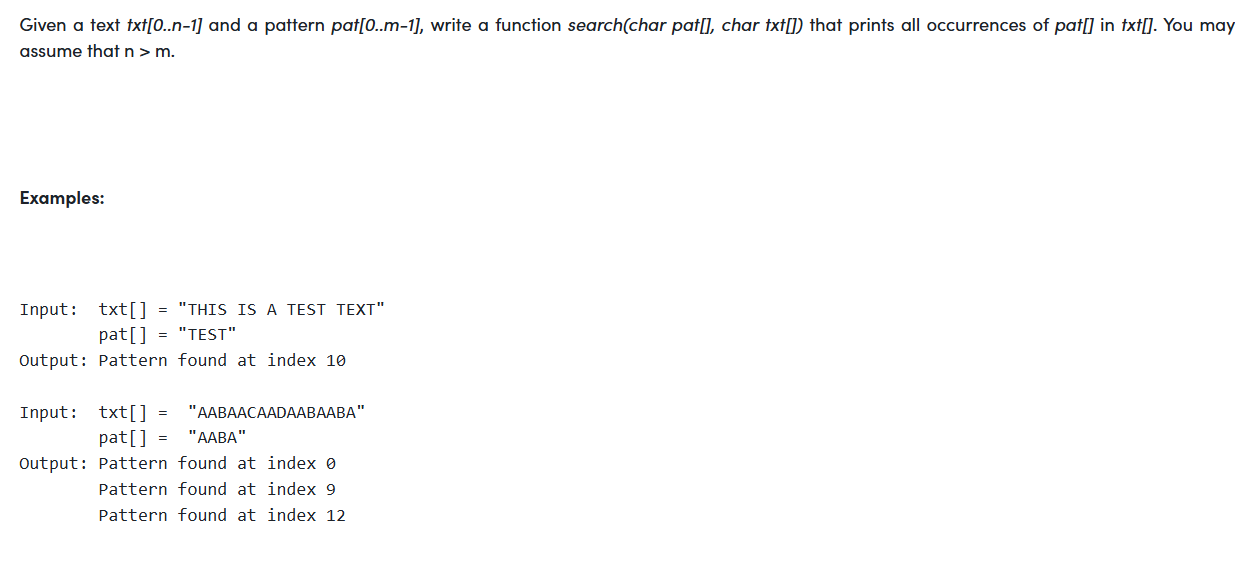

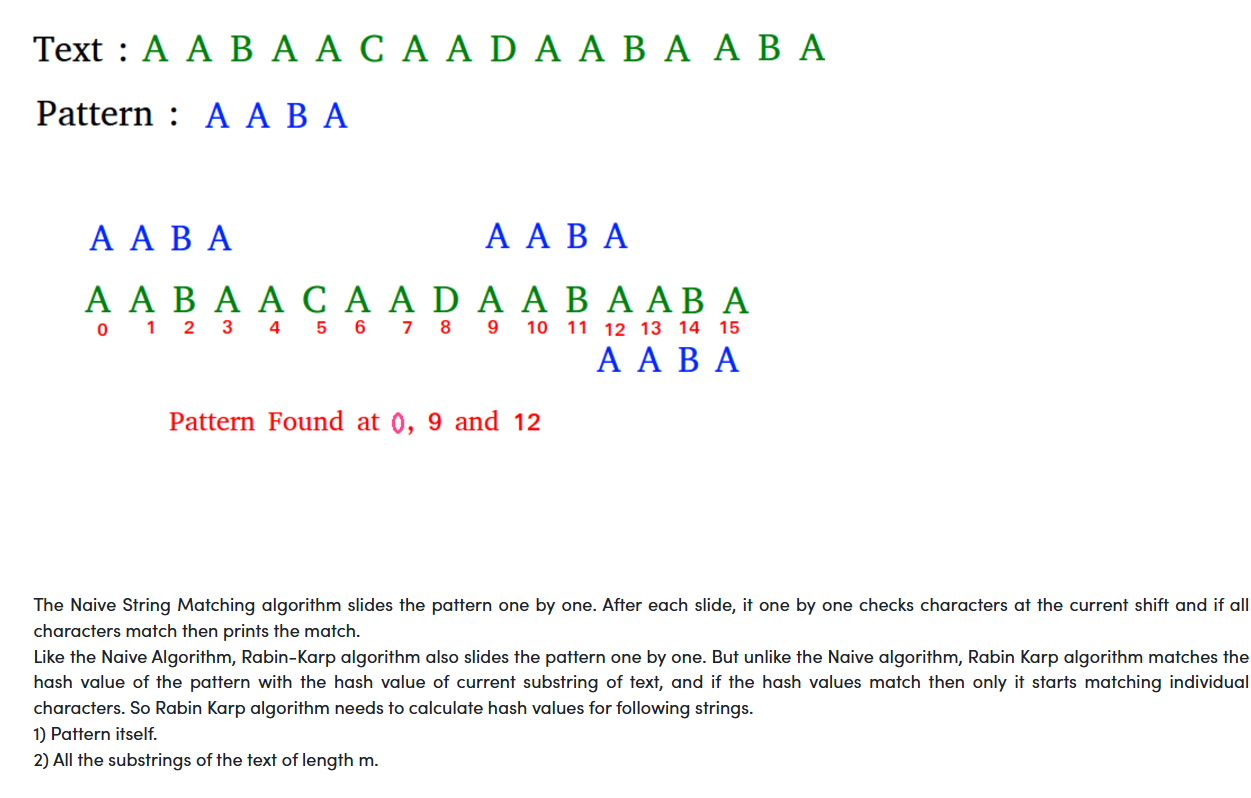

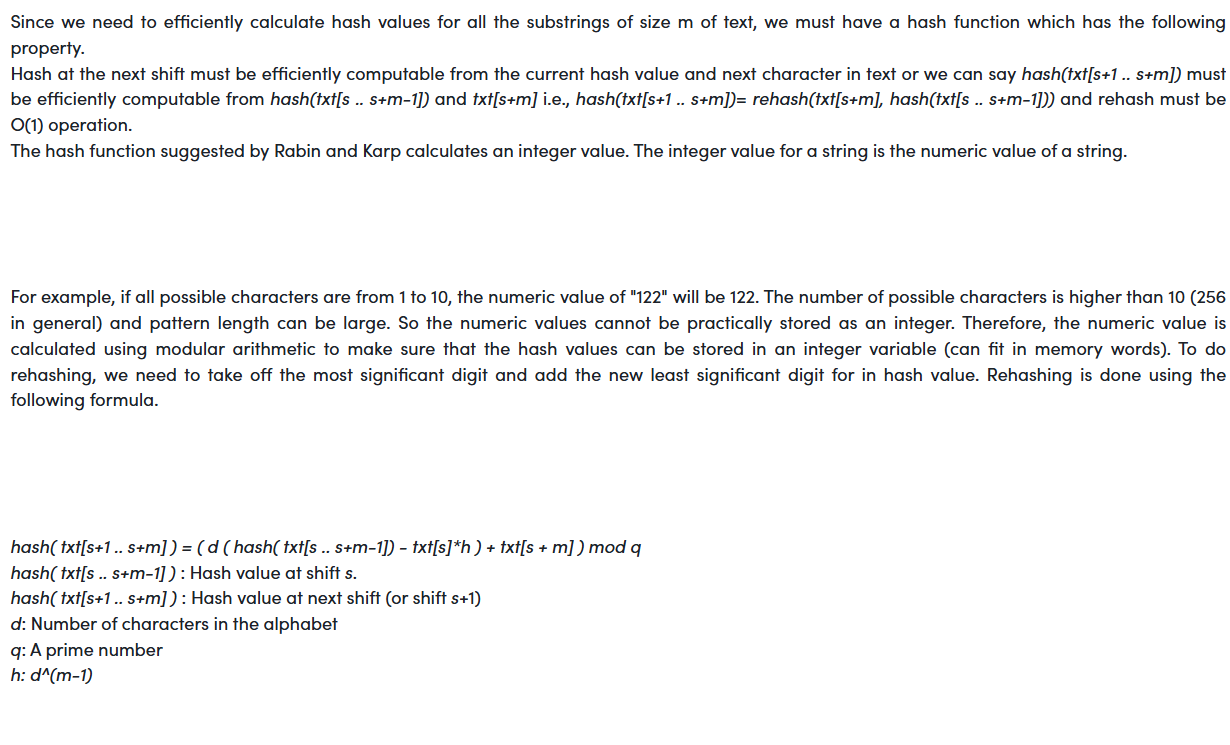

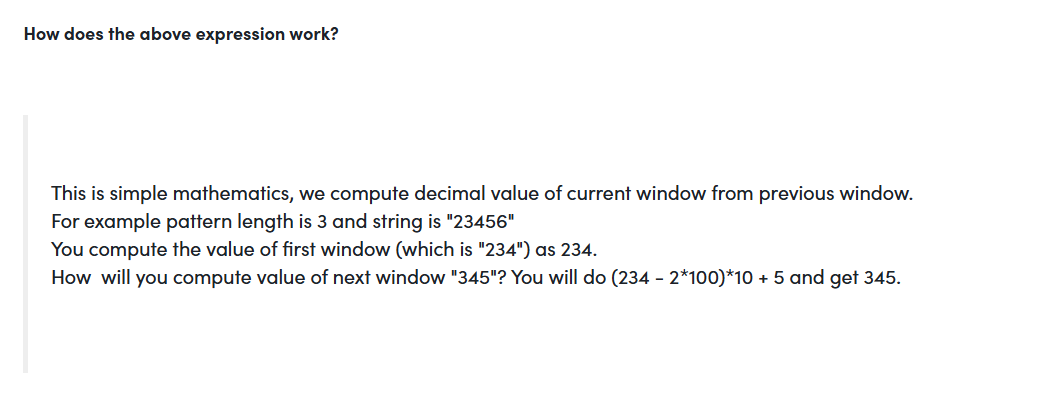

In [ ]:
# Following program is the python implementation of
# Rabin Karp Algorithm given in CLRS book

# d is the number of characters in the input alphabet
d = 256

# pat  -> pattern
# txt  -> text
# q    -> A prime number

def search(pat, txt, q):
    M = len(pat)
    N = len(txt)
    i = 0
    j = 0
    p = 0    # hash value for pattern
    t = 0    # hash value for txt
    h = 1

    # The value of h would be "pow(d, M-1)%q"
    for i in range(M-1):
        h = (h*d)%q

    # Calculate the hash value of pattern and first window
    # of text
    for i in range(M):
        p = (d*p + ord(pat[i]))%q
        t = (d*t + ord(txt[i]))%q

    # Slide the pattern over text one by one
    for i in range(N-M+1):
        # Check the hash values of current window of text and
        # pattern if the hash values match then only check
        # for characters one by one
        if p==t:
            # Check for characters one by one
            for j in range(M):
                if txt[i+j] != pat[j]:
                    break
                else: j+=1

            # if p == t and pat[0...M-1] = txt[i, i+1, ...i+M-1]
            if j==M:
                print ("Pattern found at index " + str(i))

        # Calculate hash value for next window of text: Remove
        # leading digit, add trailing digit
        if i < N-M:
            t = (d*(t-ord(txt[i])*h) + ord(txt[i+M]))%q

            # We might get negative values of t, converting it to
            # positive
            if t < 0:
                t = t+q

# Driver Code
txt = "GEEKS FOR GEEKS"
pat = "GEEK"

# A prime number
q = 101

# Function Call
search(pat,txt,q)

# This code is contributed by Bhavya Jain

Pattern found at index 0
Pattern found at index 10


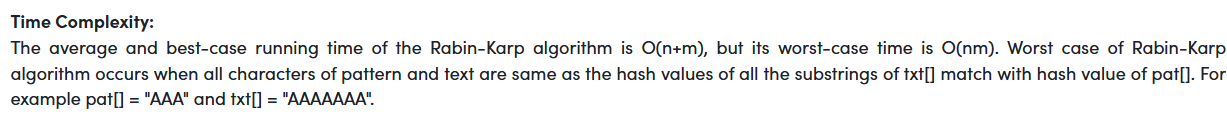

# KMP Algorithm for Pattern Searching

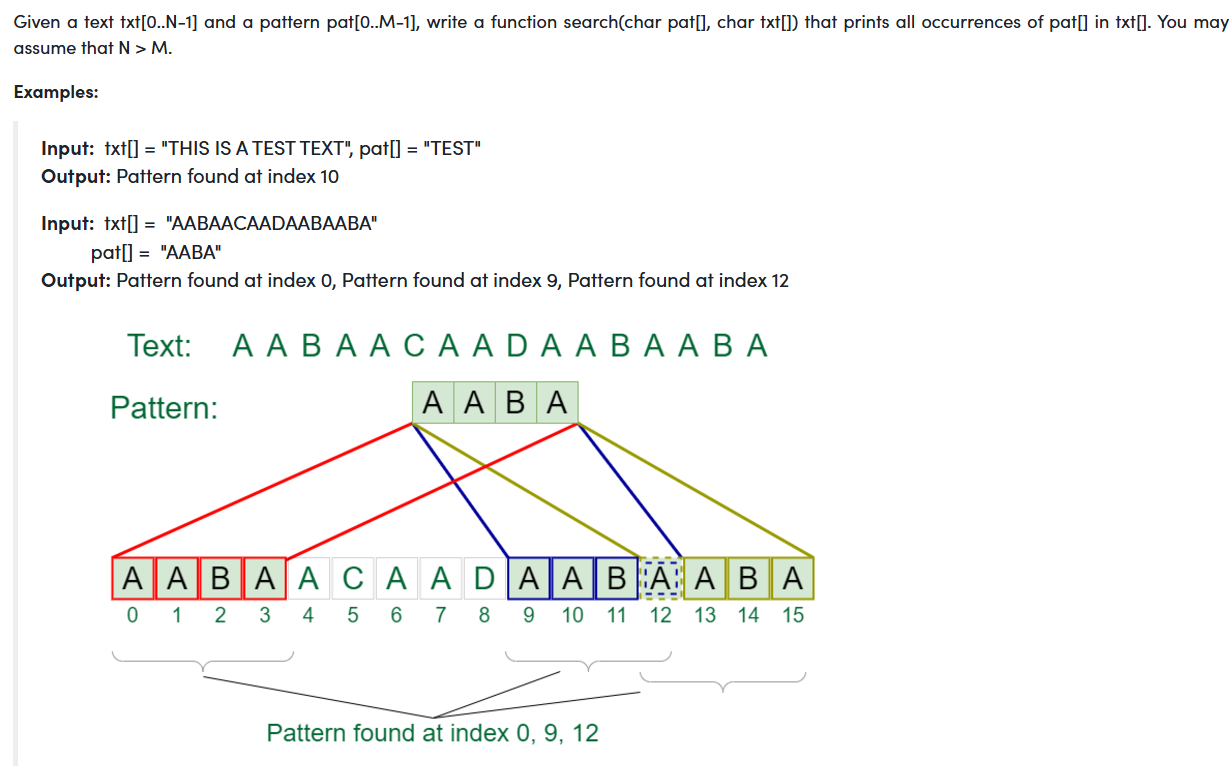

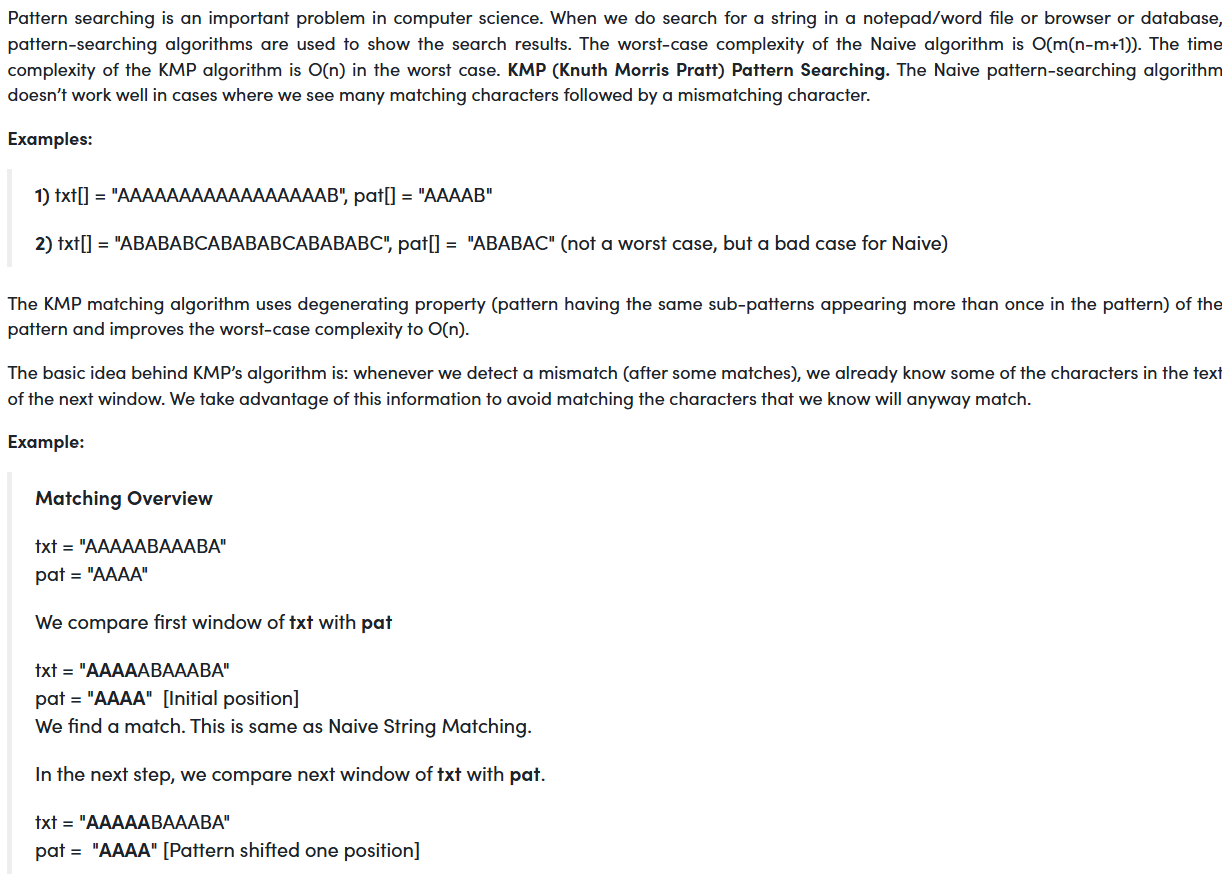

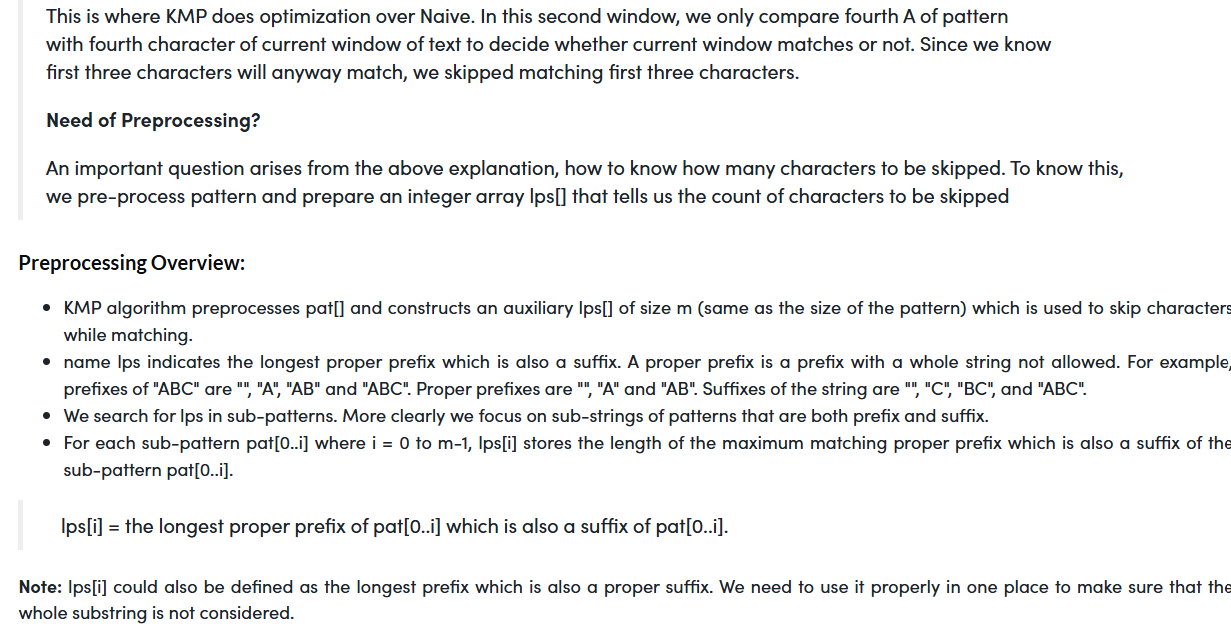

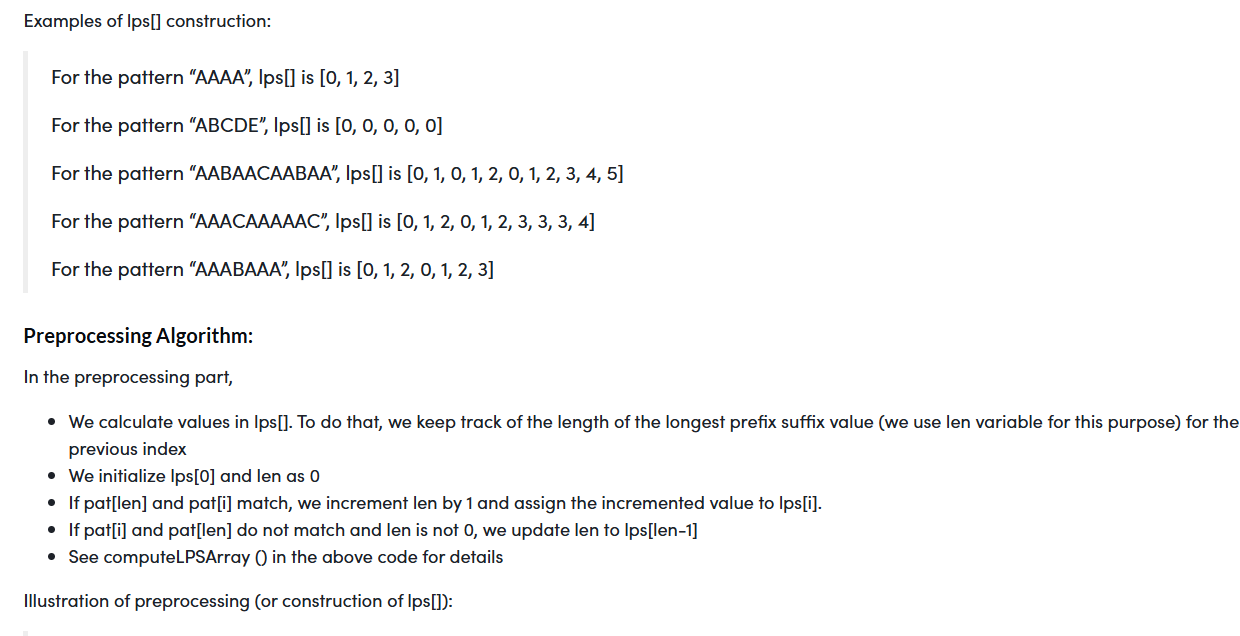

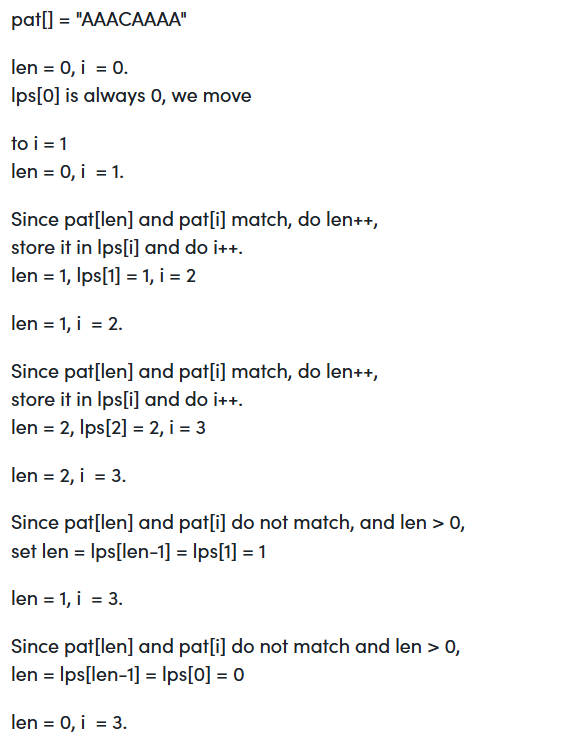

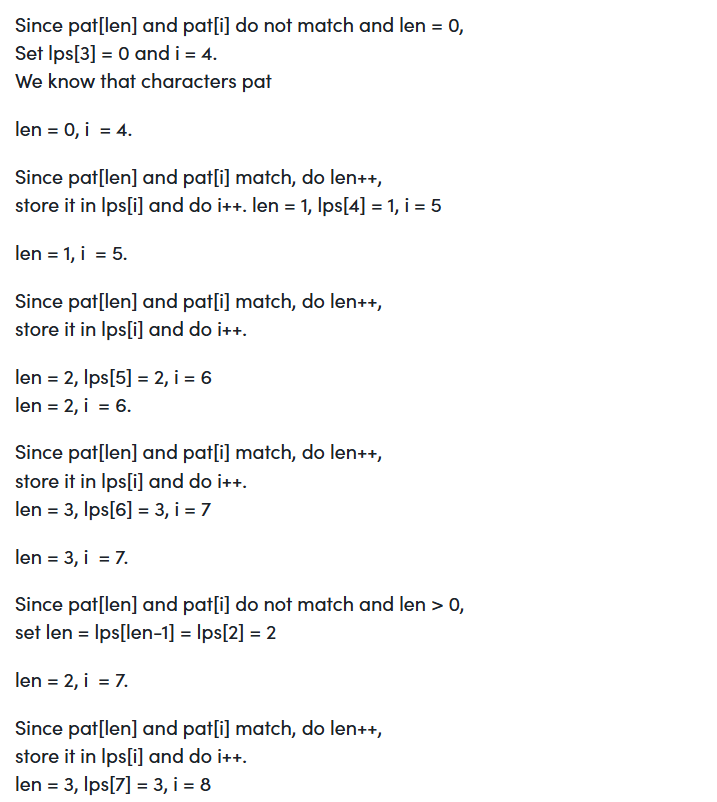

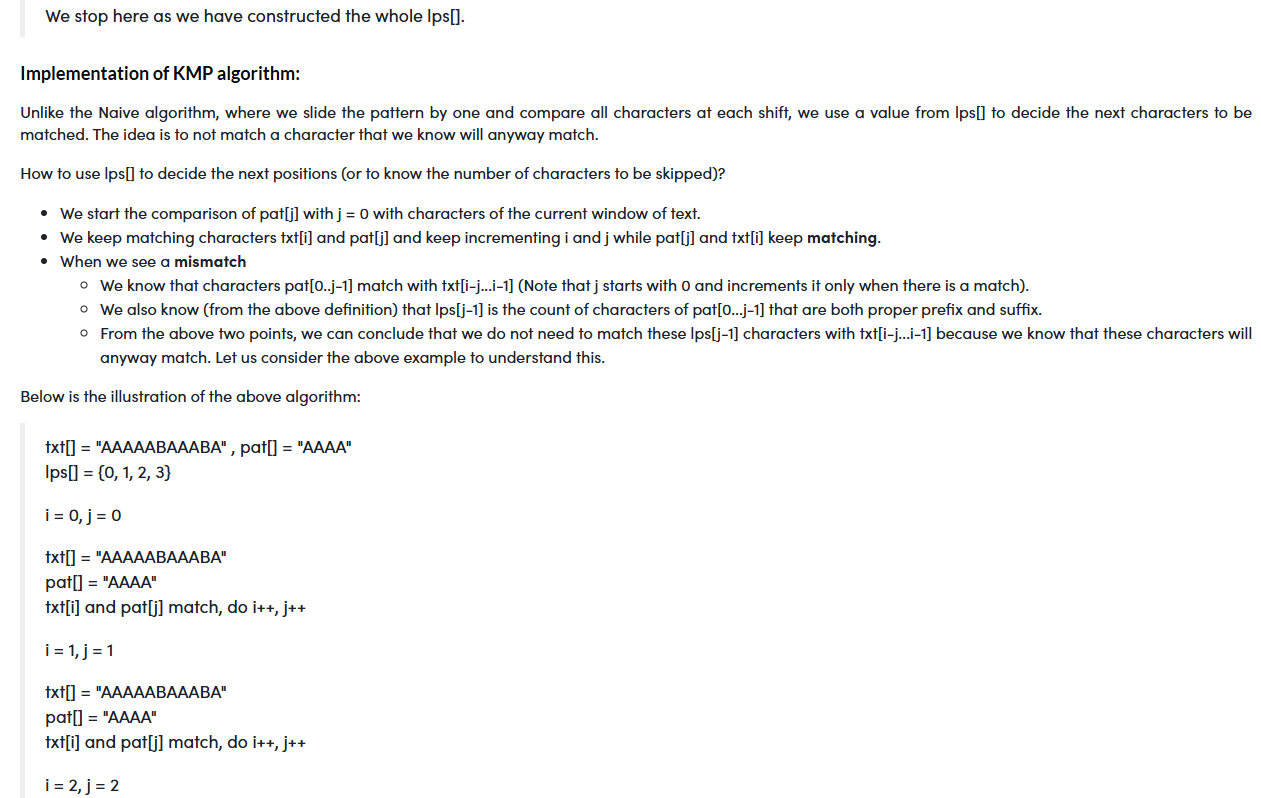

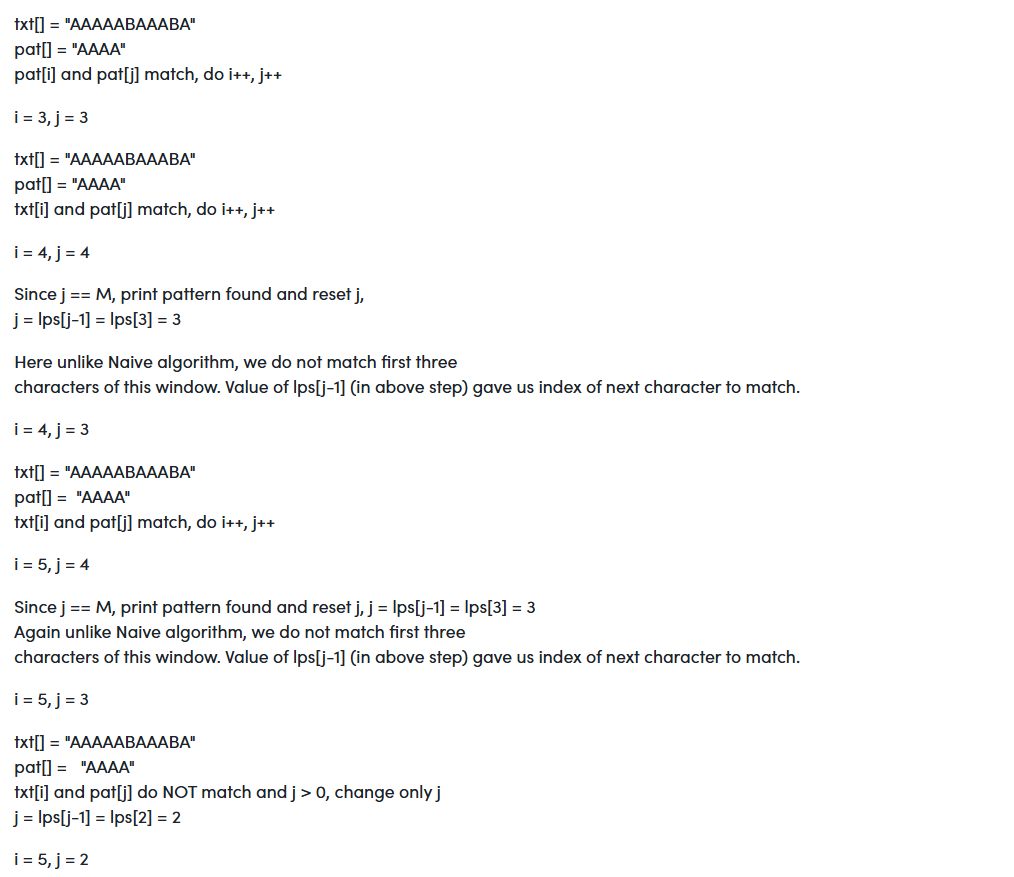

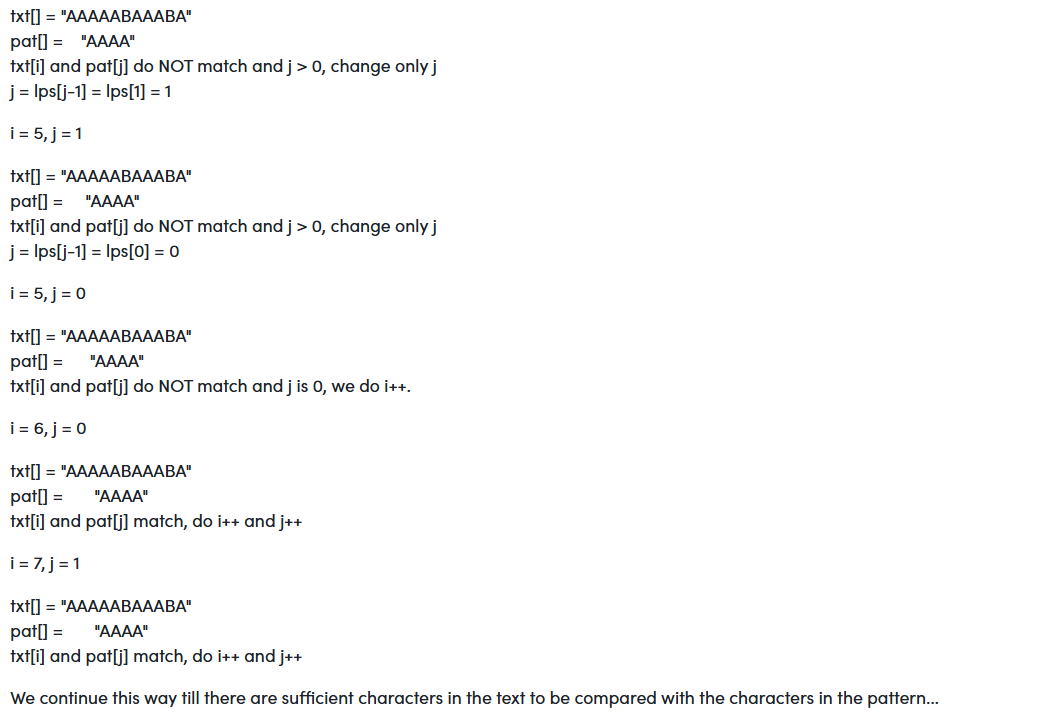

In [ ]:

def computeLPSArray(pat):
    M = len(pat)
    lps = [0] * M
    length = 0
    lps[0] = 0
    i = 1
    while i < M:
        if pat[i] == pat[length]:
            length += 1
            lps[i] = length
            i += 1
        else:
            if length != 0:
                length = lps[length - 1]
            else:
                lps[i] = 0
                i += 1
    return lps

def KMPSearch(pat, txt):
    M = len(pat)
    N = len(txt)
    lps = computeLPSArray(pat)
    i = 0
    j = 0
    while i < N:
        if pat[j] == txt[i]:
            i += 1
            j += 1
        if j == M:
            print(f"Found pattern at index {i - j}")
            j = lps[j - 1]
        elif i < N and pat[j] != txt[i]:
            if j != 0:
                j = lps[j - 1]
            else:
                i += 1

txt = "ABABDABACDABABCABAB"
pat = "ABABCABAB"
KMPSearch(pat, txt)

Found pattern at index 10


**Time Complexity: O(N)**


**Auxiliary Space: O(M)**

# KMP Agorithm (Part 1 : Constructing LPS Array)

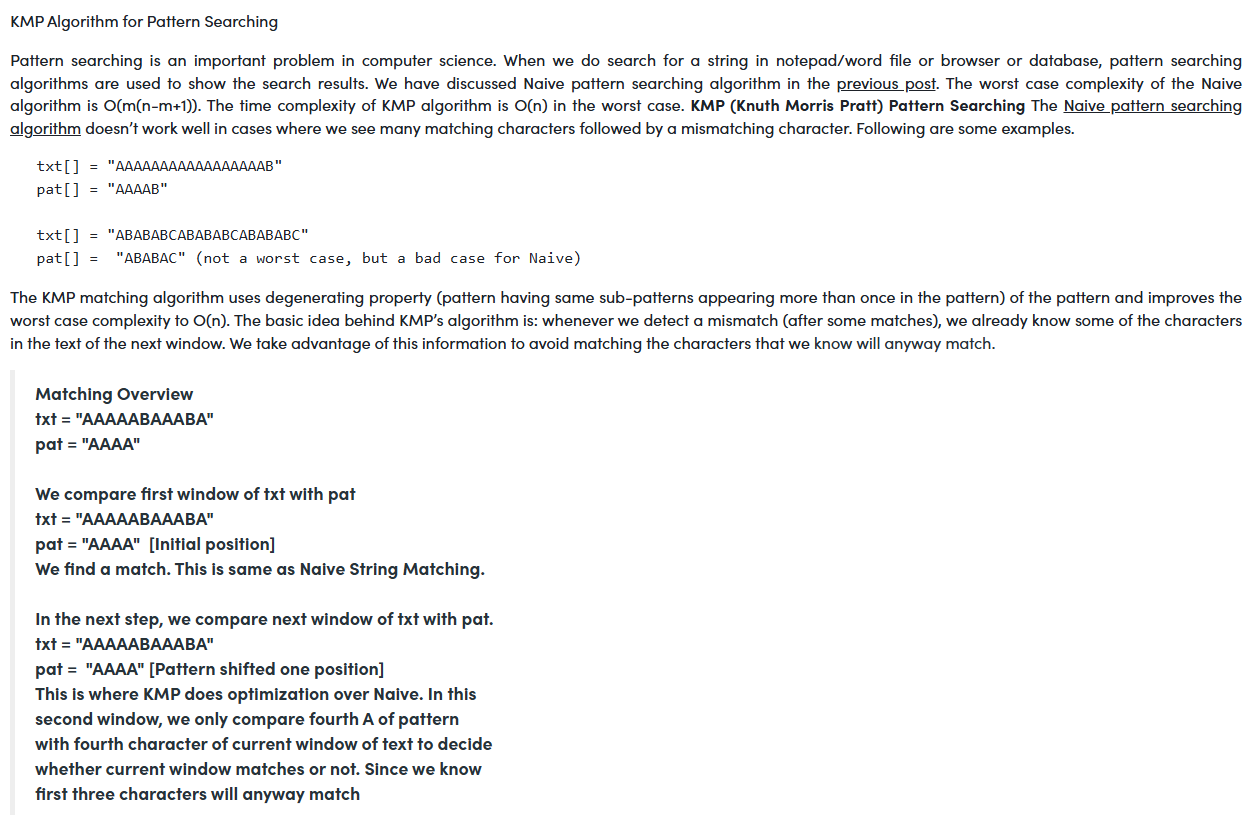

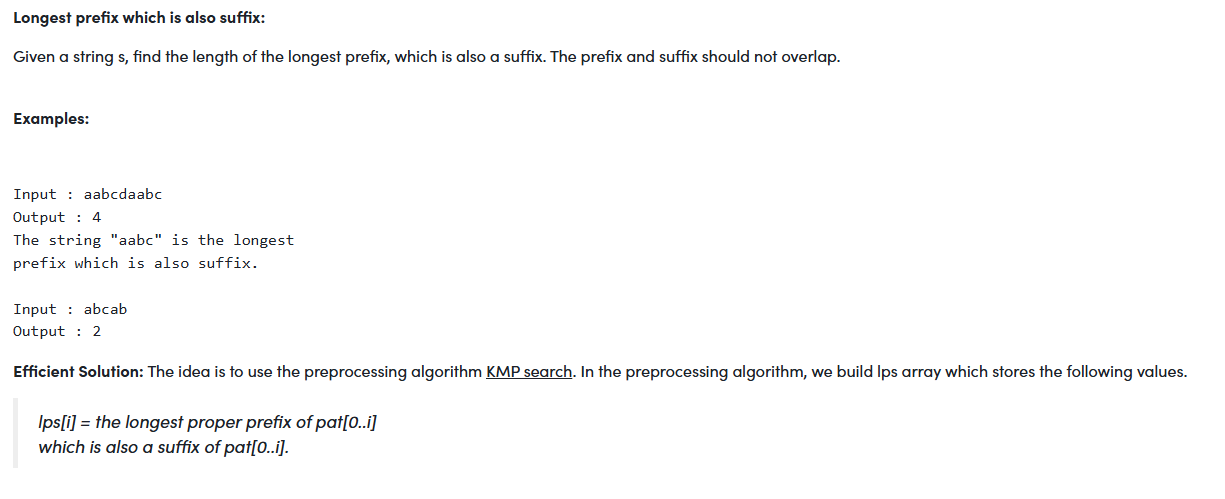

In [ ]:
# KMP Agorithm


def longestPrefixSuffix(s) :
    n = len(s)
    lps = [0] * n
    l = 0

    i = 1
    while (i < n) :
        if (s[i] == s[l]) :
            l = l + 1
            lps[i] = l
            i = i + 1

        else :
            if (l != 0) :
                l = lps[l-1]

            else :

                lps[i] = 0
                i = i + 1

    res = lps[n-1]
    if(res > n/2) :
        return n//2
    else :
        return res



s = "abcab"
print(longestPrefixSuffix(s))
# KMP Agorithm


def longestPrefixSuffix(s) :
    n = len(s)
    lps = [0] * n
    l = 0

    i = 1
    while (i < n) :
        if (s[i] == s[l]) :
            l = l + 1
            lps[i] = l
            i = i + 1

        else :
            if (l != 0) :
                l = lps[l-1]

            else :

                lps[i] = 0
                i = i + 1

    res = lps[n-1]
    if(res > n/2) :
        return n//2
    else :
        return res



s = "abcab"
print(longestPrefixSuffix(s))

2
2


# KMP Agorithm (Part 2 : Complete Algorithm)

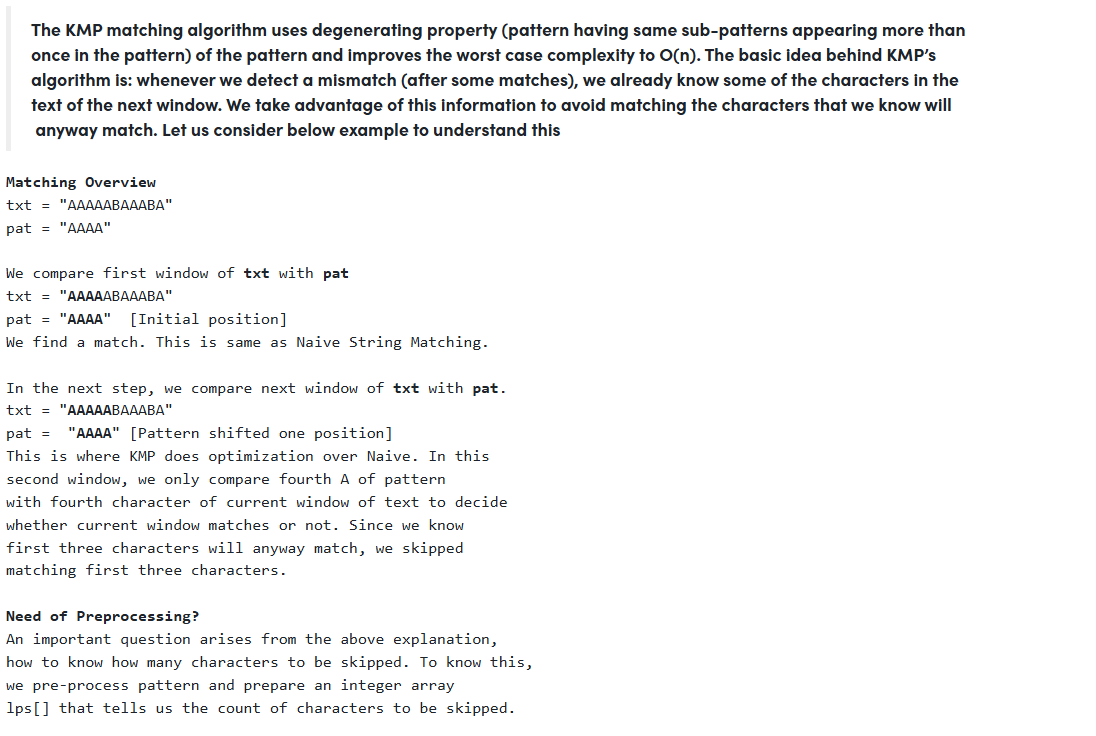

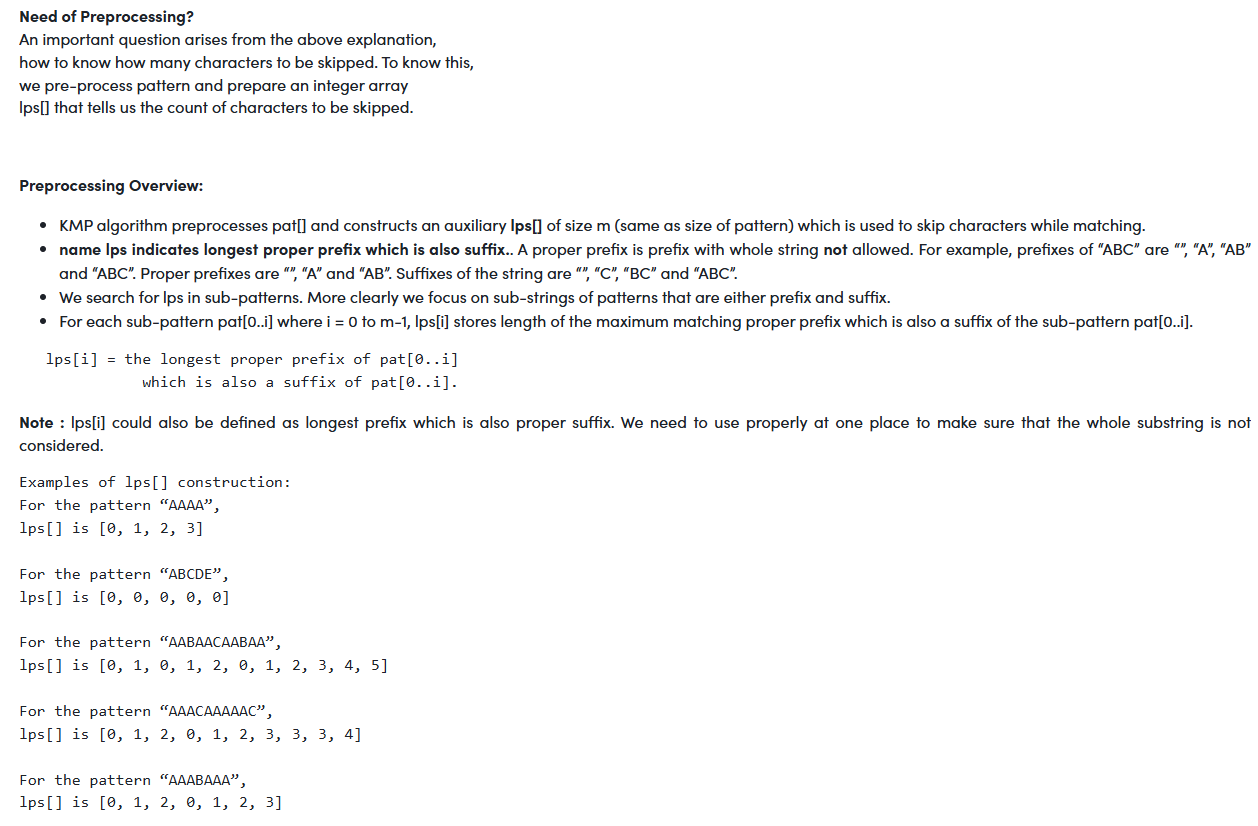

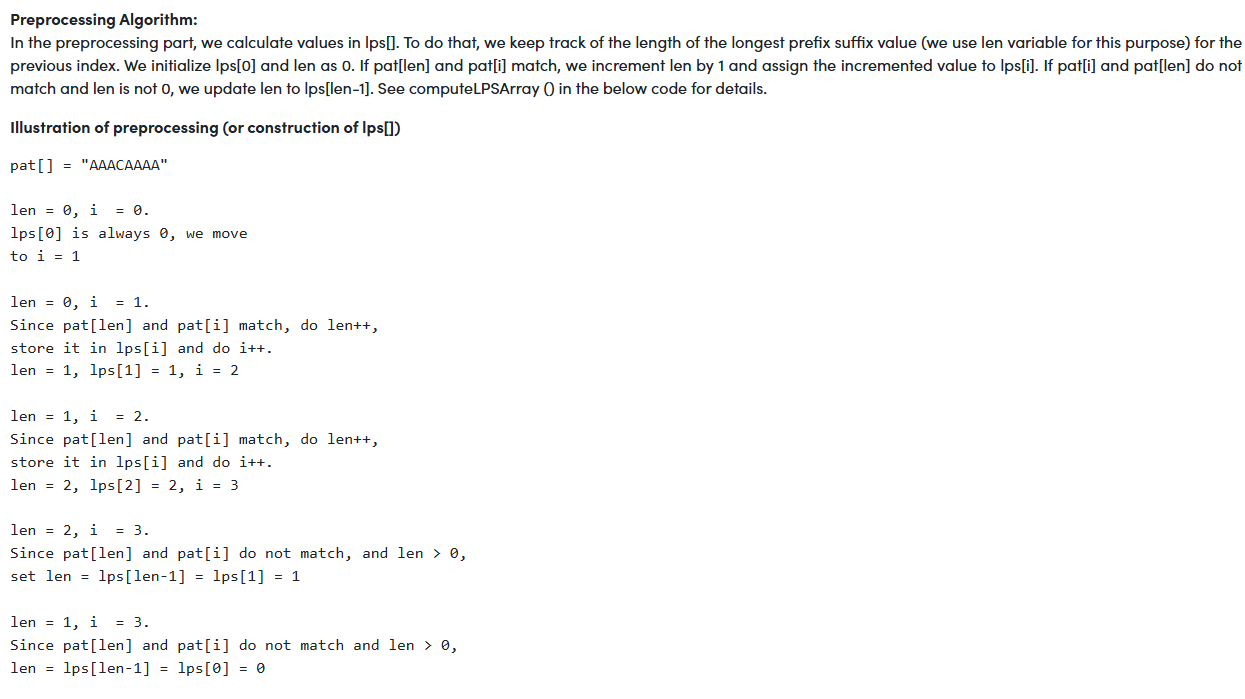

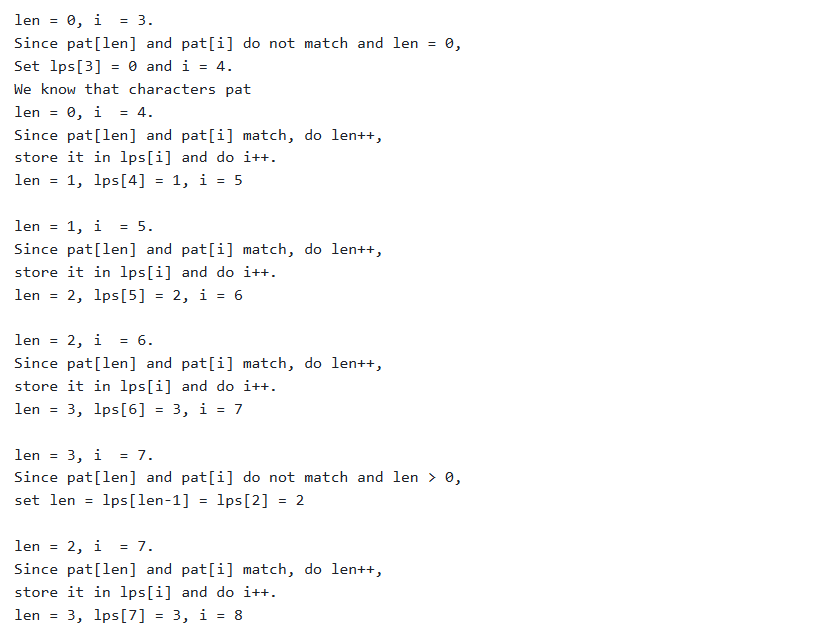

In [ ]:
# KMP Agorithm


def longestPrefixSuffix(s) :
    n = len(s)
    lps = [0] * n
    l = 0

    i = 1
    while (i < n) :
        if (s[i] == s[l]) :
            l = l + 1
            lps[i] = l
            i = i + 1

        else :
            if (l != 0) :
                l = lps[l-1]

            else :

                lps[i] = 0
                i = i + 1

    res = lps[n-1]
    if(res > n/2) :
        return n//2
    else :
        return res



s = "abcab"
print(longestPrefixSuffix(s))

2


# Anagram Search

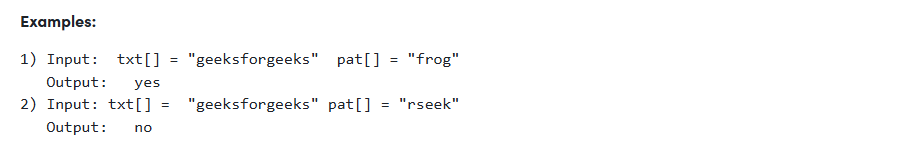

In [ ]:
# Anagram Search

CHAR = 256
def areanagram(pat,txt,i) :
    count = [0] * CHAR
    for j in range(len(pat)) :
        count[ord(pat[j])] += 1
        count[ord(txt[i + j])] -= 1
    for j in range(CHAR) :
        if count[j] != 0 :
            return False
    return True

def ispresent(txt,pat) :
    n = len(txt)
    m = len(pat)
    for i in range(n-m+1) :
        if areanagram(pat,txt,i) :
            return True
    return False


txt = "geeksforgeeks"
pat = "frog"
print(ispresent(txt,pat))

True


**Effective Approach**

In [ ]:
# Anagram Search

CHAR = 256
def aresame(ct,cp) :
    for i in range(CHAR) :
        if ct[i] != cp[i] :
            return False
    return True

def ispresent(txt,pat) :
    n = len(txt)
    m = len(pat)
    ct = [0] * CHAR
    cp = [0] * CHAR
    for i in range(m) :
        ct[ord(txt[i])] += 1
        cp[ord(pat[i])] += 1
    for i in range(m,n) :
        if aresame(ct,cp) :
            return True
        ct[ord(txt[i])] += 1
        ct[ord(txt[i-m])] -= 1
    return False


txt = "geeksforgeeks"
pat = "frog"
print(ispresent(txt,pat))

True


# Lexicographic rank of a string

**Given a string, find its rank among all its permutations sorted lexicographically. For example, rank of "abc" is 1, rank of "acb" is 2, and rank of "cba" is 6.**

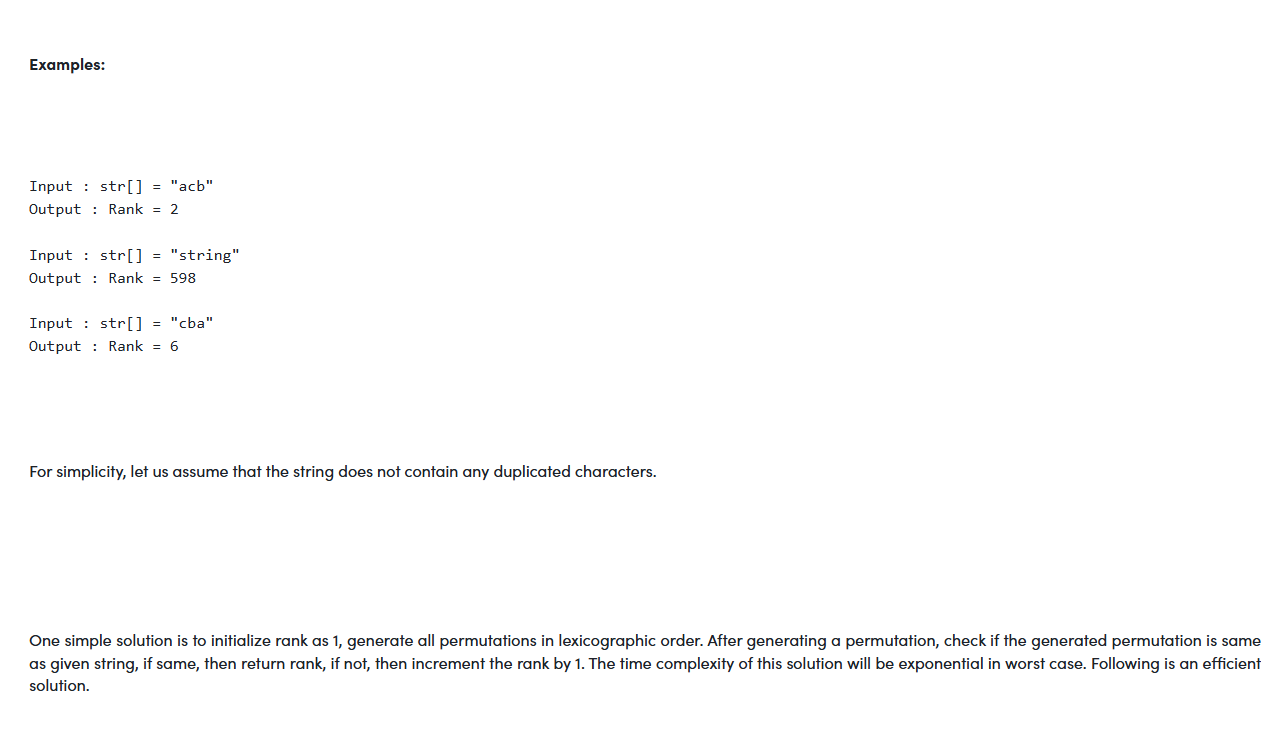

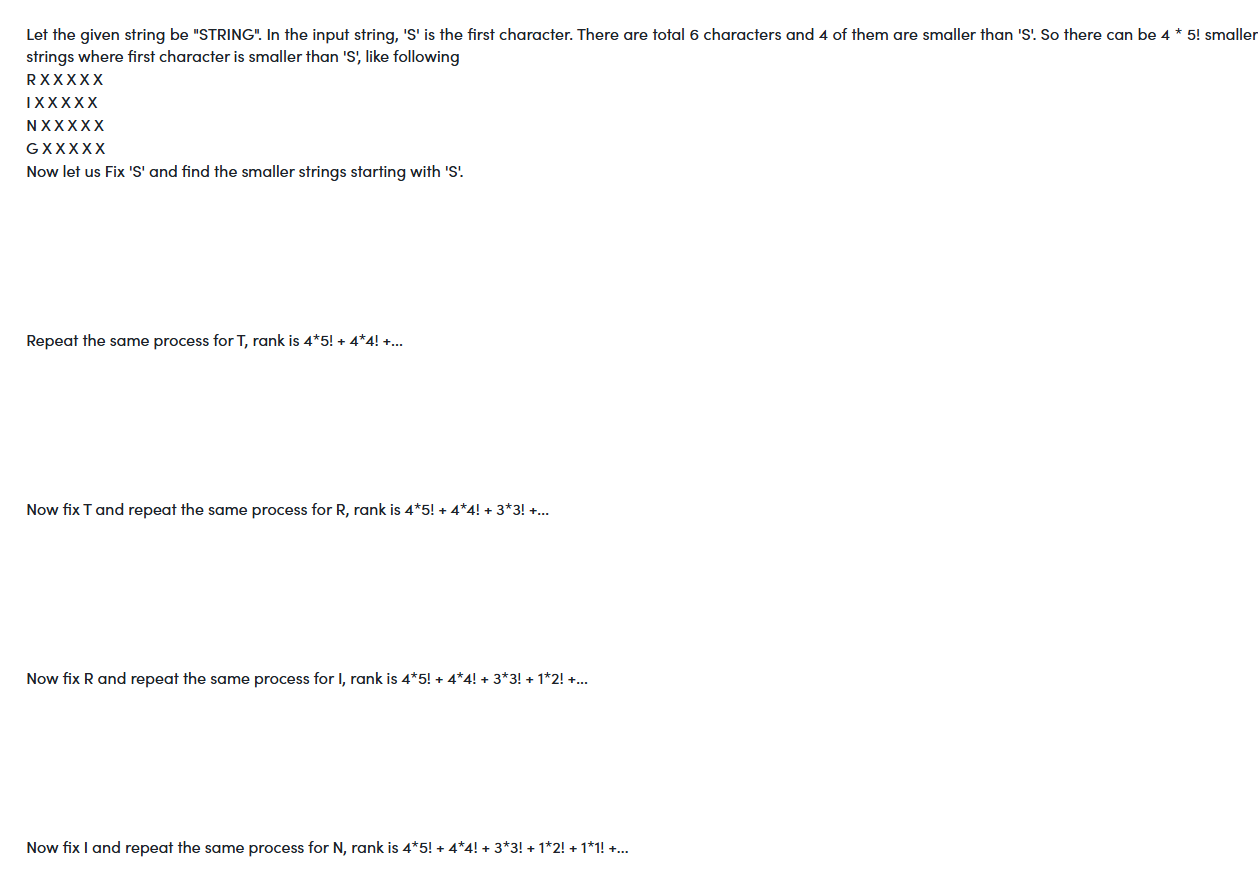

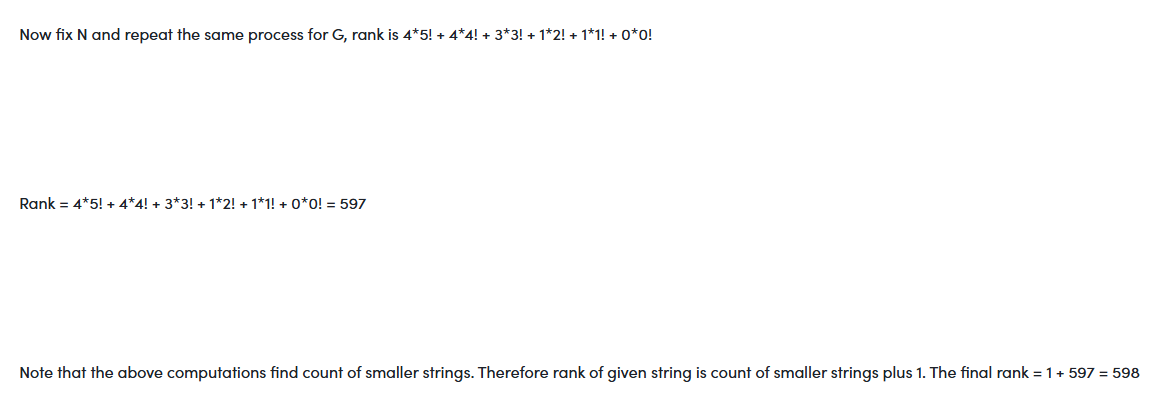

In [ ]:
# Python program to find lexicographic
# rank of a string

# A utility function to find factorial
# of n
def fact(n) :
    f = 1
    while n >= 1 :
        f = f * n
        n = n - 1
    return f

# A utility function to count smaller
# characters on right of arr[low]
def findSmallerInRight(st, low, high) :

    countRight = 0
    i = low + 1
    while i <= high :
        if st[i] < st[low] :
            countRight = countRight + 1
        i = i + 1

    return countRight

# A function to find rank of a string
# in all permutations of characters
def findRank (st) :
    ln = len(st)
    mul = fact(ln)
    rank = 1
    i = 0

    while i < ln :

        mul = mul // (ln - i)

        # count number of chars smaller
        # than str[i] from str[i + 1] to
        # str[len-1]
        countRight = findSmallerInRight(st, i, ln-1)

        rank = rank + countRight * mul
        i = i + 1

    return rank


# Driver program to test above function
st = "string"
print (findRank(st))

# This code is contributed by Nikita Tiwari.

598


**The time complexity of the above solution is O(n^2). We can reduce the time complexity to O(n) by creating an auxiliary array of size 256. See following code.**

In [ ]:
# A O(n) solution for finding rank of string
MAX_CHAR=256;

# all elements of count[] are initialized with 0
count=[0]*(MAX_CHAR + 1);

# A utility function to find factorial of n
def fact(n):
    return 1 if(n <= 1) else (n * fact(n - 1));

# Construct a count array where value at every index
# contains count of smaller characters in whole string
def populateAndIncreaseCount(str):
    for i in range(len(str)):
        count[ord(str[i])]+=1;

    for i in range(1,MAX_CHAR):
        count[i] += count[i - 1];

# Removes a character ch from count[] array
# constructed by populateAndIncreaseCount()
def updatecount(ch):

    for i in range(ord(ch),MAX_CHAR):
        count[i]-=1;

# A function to find rank of a string in all permutations
# of characters
def findRank(str):
    len1 = len(str);
    mul = fact(len1);
    rank = 1;


    # Populate the count array such that count[i]
    # contains count of characters which are present
    # in str and are smaller than i
    populateAndIncreaseCount(str);

    for i in range(len1):
        mul = mul//(len1 - i);

        # count number of chars smaller than str[i]
        # from str[i+1] to str[len-1]
        rank += count[ord(str[i]) - 1] * mul;

        # Reduce count of characters greater than str[i]
        updatecount(str[i]);

    return rank;

# Driver code
str = "string";
print(findRank(str));

# This is code is contributed by chandan_jnu

598



**The above programs don't work for duplicate characters. To make them work for duplicate characters, find all the characters that are smaller (include equal this time also), do the same as above but, this time divide the rank so formed by p! where p is the count of occurrences of the repeating character.
Please write comments if you find anything incorrect, or you want to share more information about the topic discussed above.**


# Longest Substring with Distinct Characters

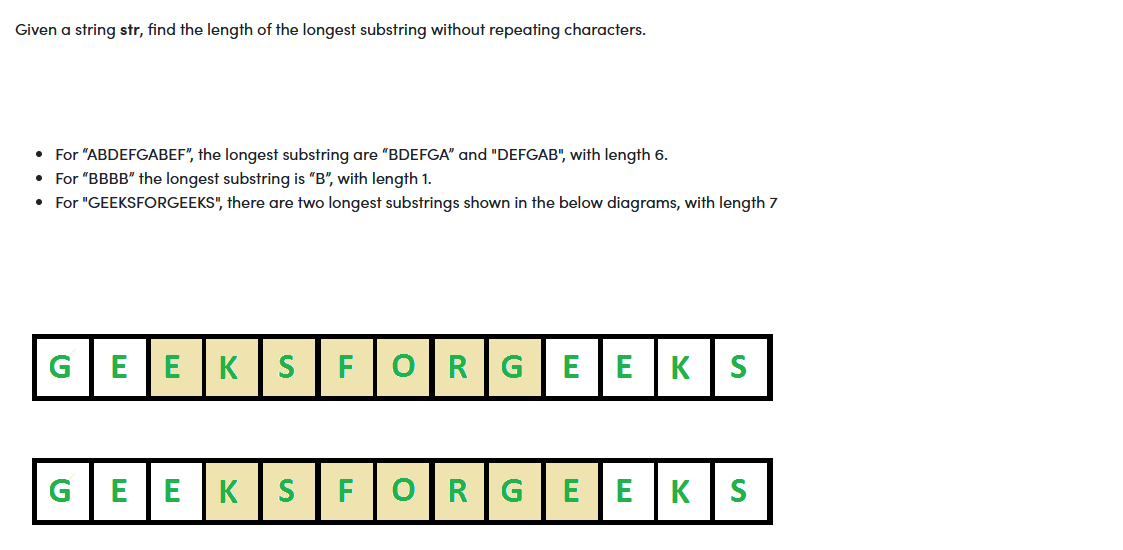

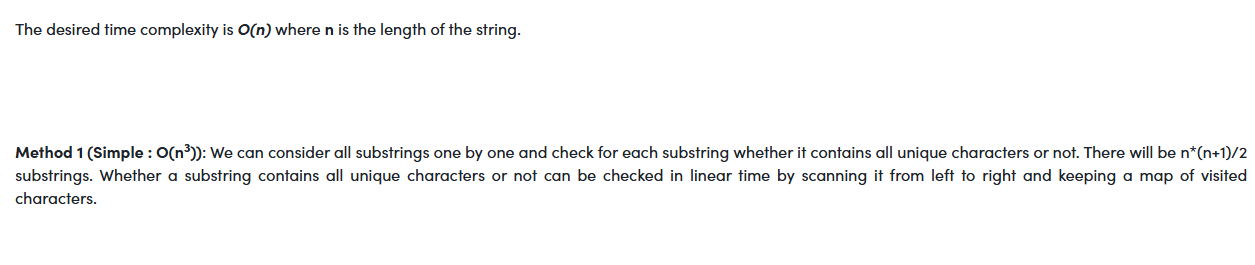

In [ ]:
# Python3 program to find the length
# of the longest substring without
# repeating characters

# This function returns true if all
# characters in str[i..j] are
# distinct, otherwise returns false
def areDistinct(str, i, j):

    # Note : Default values in visited are false
    visited = [0] * (26)

    for k in range(i, j + 1):
        if (visited[ord(str[k]) -
                   ord('a')] == True):
            return False

        visited[ord(str[k]) -
                ord('a')] = True

    return True

# Returns length of the longest substring
# with all distinct characters.
def longestUniqueSubsttr(str):

    n = len(str)

    # Result
    res = 0

    for i in range(n):
        for j in range(i, n):
            if (areDistinct(str, i, j)):
                res = max(res, j - i + 1)

    return res

# Driver code
if __name__ == '__main__':

    str = "geeksforgeeks"
    print("The input is ", str)

    len = longestUniqueSubsttr(str)
    print("The length of the longest "
          "non-repeating character substring is ", len)

# This code is contributed by mohit kumar 29

The input is  geeksforgeeks
The length of the longest non-repeating character substring is  7


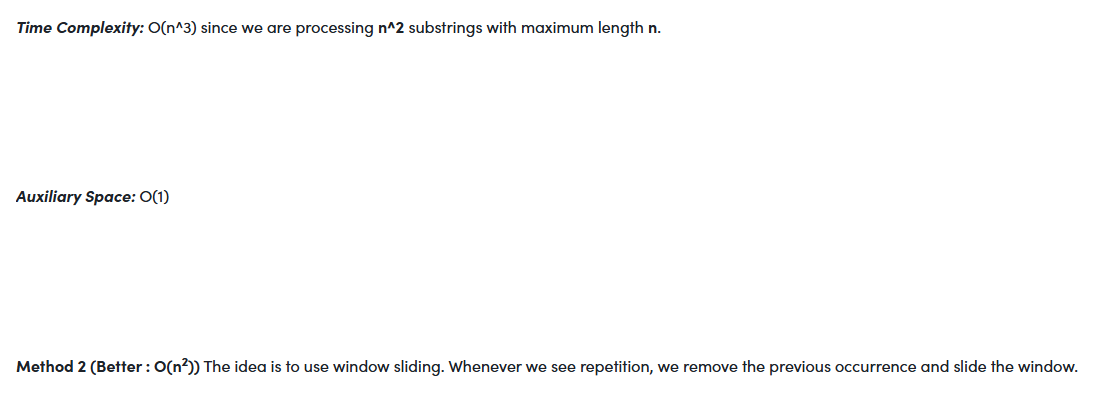

In [ ]:
def longestUniqueSubsttr(str):

    # Use a different variable name to avoid shadowing the built-in 'len' function
    n = len(str) # len() is used to get length of the string. Reassigning len to an int caused the problem.

    # Result
    res = 0

    for i in range(n):

        # Note : Default values in
        # visited are false
        visited = [0] * 256

        for j in range(i, n):

            # If current character is visited
            # Break the loop
            if (visited[ord(str[j])] == True):
                break

            # Else update the result if
            # this window is larger, and mark
            # current character as visited.
            else:
                res = max(res, j - i + 1)
                visited[ord(str[j])] = True

        # Remove the first character of previous
        # window
        visited[ord(str[i])] = False

    return res

# Driver code
str = "geeksforgeeks"
print("The input is ", str)

# Use a different variable name, like 'length', instead of 'len'
length = longestUniqueSubsttr(str) # changed the variable name to length
print("The length of the longest "
      "non-repeating character substring is ", length)

# This code is contributed by sanjoy_62

The input is  geeksforgeeks
The length of the longest non-repeating character substring is  7


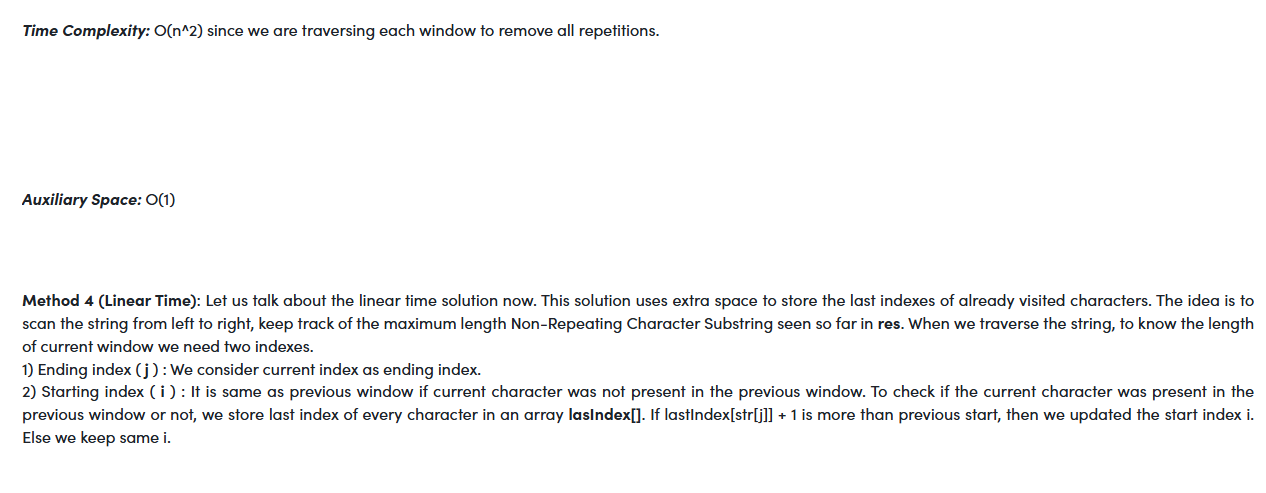

In [ ]:
# Python3 program to find the length
# of the longest substring
# without repeating characters
def longestUniqueSubsttr(string):

    # last index of every character
    last_idx = {}
    max_len = 0

    # starting index of current
    # window to calculate max_len
    start_idx = 0

    for i in range(0, len(string)):

        # Find the last index of str[i]
        # Update start_idx (starting index of current window)
        # as maximum of current value of start_idx and last
        # index plus 1
        if string[i] in last_idx:
            start_idx = max(start_idx, last_idx[string[i]] + 1)

        # Update result if we get a larger window
        max_len = max(max_len, i-start_idx + 1)

        # Update last index of current char.
        last_idx[string[i]] = i

    return max_len


# Driver program to test the above function
string = "geeksforgeeks"
print("The input string is " + string)
length = longestUniqueSubsttr(string)
print("The length of the longest non-repeating character" + " substring is " + str(length))

The input string is geeksforgeeks


TypeError: 'str' object is not callable

In [24]:
def longestUniqueSubsttr(string):

    # last index of every character
    last_idx = {}
    max_len = 0

    # starting index of current
    # window to calculate max_len
    start_idx = 0

    for i in range(0, len(string)):

        # Find the last index of str[i]
        # Update start_idx (starting index of current window)
        # as maximum of current value of start_idx and last
        # index plus 1
        if string[i] in last_idx:
            start_idx = max(start_idx, last_idx[string[i]] + 1)

        # Update result if we get a larger window
        max_len = max(max_len, i-start_idx + 1)

        # Update last index of current char.
        last_idx[string[i]] = i

    return max_len


# Driver program to test the above function
string = "geeksforgeeks"
print("The input string is " + string)
length = longestUniqueSubsttr(string)
# Use the built-in str() function to convert 'length' to a string
# Avoid using 'str' as a variable name to prevent conflicts
print("The length of the longest non-repeating character" +
      " substring is " + str(length)) # using str() function to convert length to string for printing

The input string is geeksforgeeks
The length of the longest non-repeating character substring is 7


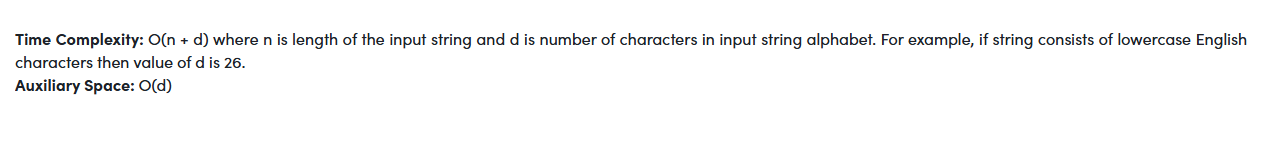

In [25]:
# Here, we are planning to implement a simple sliding window methodology

def longestUniqueSubsttr(string):

    # Creating a set to store the last positions of occurrence
    seen = {}
    maximum_length = 0

    # starting the initial point of window to index 0
    start = 0

    for end in range(len(string)):

        # Checking if we have already seen the element or not
        if string[end] in seen:

            # If we have seen the number, move the start pointer
            # to position after the last occurrence
            start = max(start, seen[string[end]] + 1)

        # Updating the last seen value of the character
        seen[string[end]] = end
        maximum_length = max(maximum_length, end-start + 1)
    return maximum_length

# Driver Code
string = "geeksforgeeks"
print("The input string is", string)
length = longestUniqueSubsttr(string)
print("The length of the longest non-repeating character substring is", length)

The input string is geeksforgeeks
The length of the longest non-repeating character substring is 7


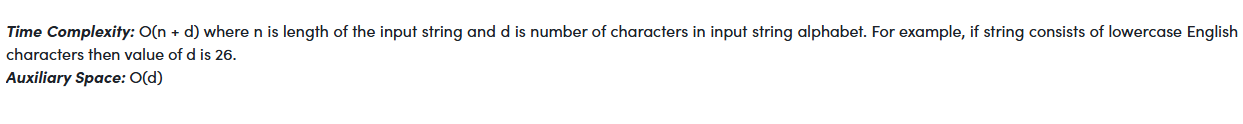